<a href="https://colab.research.google.com/github/PedroJuiz/DeepLearning/blob/main/Sequence_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge S7: Clasificación de Secuencias

## Objetivos

El objetivo de este challenge es continuar aprendiendo a trabajar con secuencias a partir del ejemplo visto en el worksheet.

### Punto de partida

Como hemos hecho en otras ocasiones, para este challenge vamos a comenzar como punto de partida con el código visto en el worksheet sobre el que realizaremos las modificaciones necesarias.

Es preferible trabajar en colab con Runtime Type: GPU para poder trabajar con todos los datos sin que nos tome una eternidad.

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
maxlen = 150  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
79/79 [==============================] - 20s 148ms/step - loss: 0.6916 - accuracy: 0.5174 - val_loss: 0.6862 - val_accuracy: 0.6214
Epoch 2/15
79/79 [==============================] - 8s 97ms/step - loss: 0.5991 - accuracy: 0.7075 - val_loss: 0.5832 - val_accuracy: 0.6855
Epoch 3/15
79/79 [==============================] - 6s 81ms/step - loss: 0.3998 - accuracy: 0.8367 - val_loss: 0.5168 - val_accuracy: 0.7435
Epoch 4/15
79/79 [==============================] - 6s 75ms/step - loss: 0.2559 - accuracy: 0.9060 - val_loss: 0.4888 - val_accuracy: 0.8051
Epoch 5/15
79/79 [==============================] - 5s 60ms/step - loss: 0.1459 - accuracy: 0.9540 - val_loss: 0.9522 - val_accuracy: 0.7303
Epoch 6/15
79/79 [==============================] - 3s 38ms

### Análisis del rendimiento

Vamos a empezar por mejorar nuestra capacidad de evaluar el modelo. Añadid a continuación el código necesario poder ver las curvas de entrenamiento de forma gráfica. A continuación, reentrenad la red y mostradlas. ¿Qué dirías del rendimiento de nuestro modelo?

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
79/79 [==============================] - 12s 120ms/step - loss: 0.6917 - accuracy: 0.5176 - val_loss: 0.6896 - val_accuracy: 0.5032
Epoch 2/15
79/79 [==============================] - 7s 84ms/step - loss: 0.6195 - accuracy: 0.6705 - val_loss: 0.5134 - val_accuracy: 0.7466
Epoch 3/15
79/79 [==============================] - 5s 58ms/step - loss: 0.4192 - accuracy: 0.8227 - val_loss: 0.4587 - val_accuracy: 0.7782
Epoch 4/15
79/79 [==============================] - 4s 51ms/step - loss: 0.2505 - accuracy: 0.9151 - val_loss: 0.5199 - val_accuracy: 0.7846
Epoch 5/15
79/79 [==============================] - 5s 61ms/step - loss: 0.1607 - accuracy: 0.9472 - val_loss: 0.4610 - val_accuracy: 0.8167
Epoch 6/15
79/79 [==============================] - 2s 27ms/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.4767 - val_accuracy: 0.7730
Epoch 7/15
79/79 [==============================] - 3s 37ms/step - loss: 0.0772 - accuracy: 0.9800 - val_loss: 0.7173 - val_accu

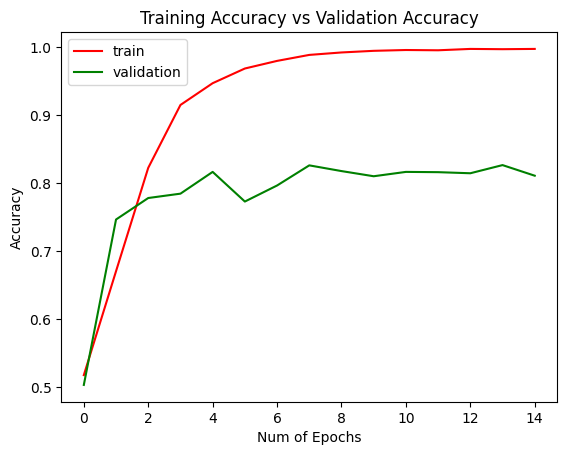

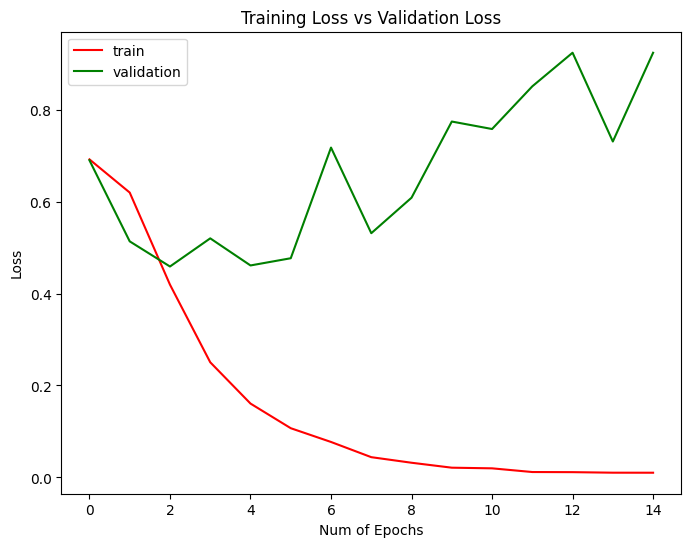

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['accuracy'],'r')
    plt.plot(history.history['val_accuracy'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])


    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])


    plt.show()

plotCurves(history,15)

Se observa que nuestro modelo tiende a sobreentrenar, debido a que a partir de un cierto número de épocas, los datos de train siguen mejorando mientras que los datos de validación se estancan e incluso empeoran.

### Dropout

Vamos a empezar a modificar el código añadiendo Dropout, lo que idealmente nos va a permitir mejorar el entrenamiento y reducir el sobreentramiento.

A continuación copiad y pegad el código anterior y realizar las modificaciones necesarias para:
- Realizar dropout sobre la capa Embedding con una probabilidad del 40%
- Realizar dropout sobre la capa LSTM con una probabilidad del 40%

Recordad mostrar las curvas de entrenamiento.

Uno de los efectos que podemos observar (y convendría recordar) cuando realizamos dropout es que a la red le cuesta más entrenar y tarda más en mejorar los resultados de train. A cambio, debería tener un menor sobreentrenamiento y, aunque tarde más, el resultado final suele mejorar.

¿Qué rendimiento se observa ahora en nuestro modelo a juzgar por las gráficas?

In [ ]:
from tensorflow.keras.layers import Dropout

max_features = 20000
maxlen = 150
batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.4))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
79/79 [==============================] - 66s 806ms/step - loss: 0.6919 - accuracy: 0.5204 - val_loss: 0.6913 - val_accuracy: 0.4872
Epoch 2/15
79/79 [==============================] - 60s 749ms/step - loss: 0.6687 - accuracy: 0.6057 - val_loss: 0.6467 - val_accuracy: 0.6313
Epoch 3/15
79/79 [==============================] - 60s 759ms/step - loss: 0.5528 - accuracy: 0.7358 - val_loss: 0.6029 - val_accuracy: 0.6477
Epoch 4/15
79/79 [==============================] - 56s 706ms/step - loss: 0.4305 - accuracy: 0.8299 - val_loss: 0.5491 - val_accuracy: 0.7670
Epoch 5/15
79/79 [==============================] - 60s 750ms/step - loss: 0.3331 - accuracy: 0.8715 - val_loss: 0.4631 - val_accuracy: 0.7958
Epoch 6/15
79/79 [==============================] - 61s 771ms/step - loss: 0.2689 - accuracy: 0.9091 - val_loss: 0.4647 - val_accuracy: 0.7966
Epoch 7/15
79/79 [==============================] - 55s 699ms/step - loss: 0.2039 - accuracy: 0.9283 - val_loss: 0.443

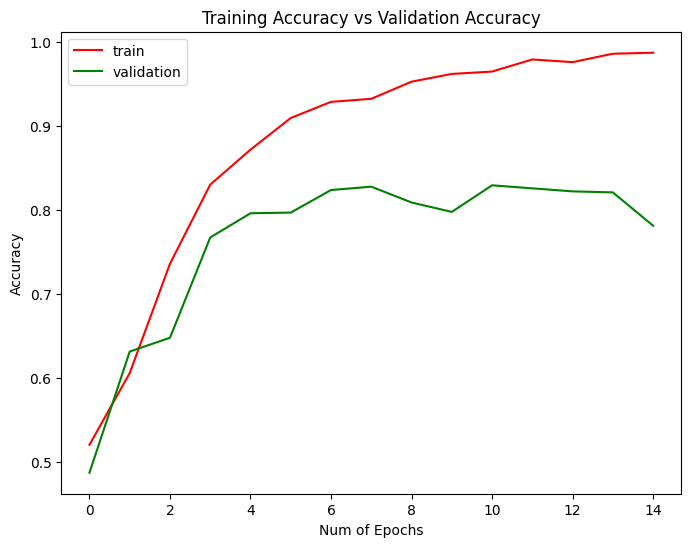

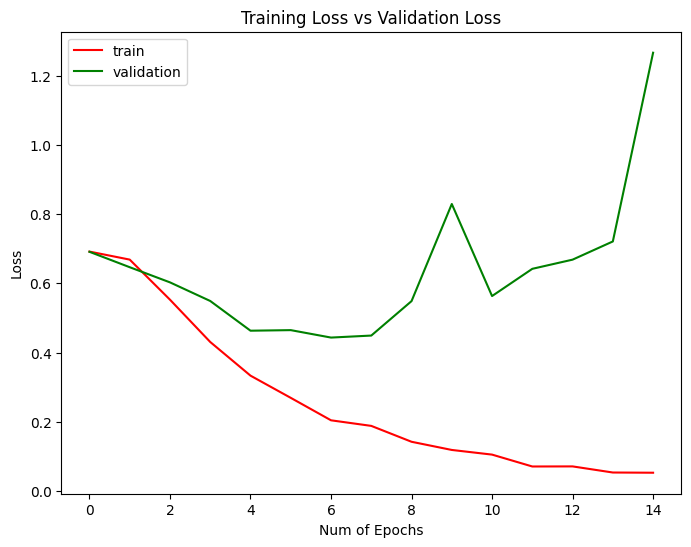

In [ ]:
plotCurves(history,15)

Se observa una peora debido a que con el paso de las epocas, las funciones de perdidas y accuracy empeoran en validación. Respecto a la función de perdida y al accuracy, se observa que el modelo ofrece peores resultados.

### CNNs + LSTMs + DNNs!

En este apartado vamos a intentar realizar una modificación un poco más compleja a nuestro sistema base.

Como sabemos, las redes Convolucionales o CNN están inspiradas en la vista humana y son muy buenas en la extracción de características sobre imágenes. Además de esto, han sido aplicadas con éxito a señales como la señal de audio o incluso señales temporales como los precios de un stock en el mercado de valores.

Sin embargo, para trabajar con secuencias, sabemos que la mejor opción son las redes recurrentes, donde destaca particularmente la red LSTM.

Una de las mejores cualidades de las redes neuronales es que son muy flexibles y podemos implementar fácilmente casi cualquier arquitectura que imaginemos. En este apartado vamos a utilizar una red que está siendo utilizada a día de hoy en muchisimos sistemas de empresas como Google, Amazon o Facebook, que lideran cláramente este campo.

Esta red es una combinación de redes convolucionales, recurrentes, y feed-forward. ¿Por qué esta combinación?
- Las redes convolucionales son buenas como extractor de características y pueden encontrar información muy útil de forma local, sobre pequeños campos receptivos de los datos de entrada
- Las redes LSTM son buenas para modelar cualquier tipo de secuencia, ya que pueden aprender del pasado y tener en cuenta el contexto
- Las redes DNN son buenas aprendiendo cualquier tipo de transformación no lineal, y por tanto en nuestro ejemplo las vamos a utilizar para extraer la salida de las LSTM y convertirla en la solución a la tarea que estamos intentando resolver


Manos a la obra, qué necesitamos para introducir estos cambios?
- Importar las nuevas capas que vamos a necesitar, que son las siguientes:
    - Conv1D , es como Conv2D pero trabaja con datos de 1 sóla dimensión.
    - MaxPooling1D , lo mismo
- Modificar el modelo añadiendo las capas necesarias, buscad en la documentación de keras o en algún ejemplo en google la sintaxis. Ojo!! la sintaxis ha ido cambiando con las versiones, aunque los cambios son mínimos y suelen mostrarse en el error que nos de.
- Al estar trabajando con Conv1D y MaxPooling1D no necesitamos ningún reshape, ya que todo va a estar siempre en una dimensión.


¿Cómo va a ser nuestro modelo?
- Definimos un modelo de tipo secuencial
- Capa de Embedding igual que la de origen
- Capa convolucional de una dimensión, con 32 filtros y campo receptivo 3
- Capa de pooling de 1 dimensión, con tamaño de pool 2
- LSTM de tamaño 128, igual que la de origen
- Capa de salida, igual que la de origen.

A continuación deberemos copiar y pegar el código de origen y realizar los cambios mencionados, recordad mostrar las curvas de aprendizaje y analizar los resultados.

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

max_features = 20000
maxlen = 150  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
79/79 [==============================] - 18s 138ms/step - loss: 0.6937 - accuracy: 0.5022 - val_loss: 0.6929 - val_accuracy: 0.4770
Epoch 2/15
79/79 [==============================] - 6s 83ms/step - loss: 0.6795 - accuracy: 0.5858 - val_loss: 2.9093 - val_accuracy: 0.4826
Epoch 3/15
79/79 [==============================] - 4s 57ms/step - loss: 0.5411 - accuracy: 0.7667 - val_loss: 0.5099 - val_accuracy: 0.7679
Epoch 4/15
79/79 [==============================] - 3s 43ms/step - loss: 0.3179 - accuracy: 0.8711 - val_loss: 0.4198 - val_accuracy: 0.8275
Epoch 5/15
79/79 [==============================] - 5s 69ms/step - loss: 0.1833 - accuracy: 0.9340 - val_loss: 0.5100 - val_accuracy: 0.8099
Epoch 6/15
79/79 [==============================] - 2s 29ms/step - loss: 0.1203 - accuracy: 0.9584 - val_loss: 0.4554 - val_

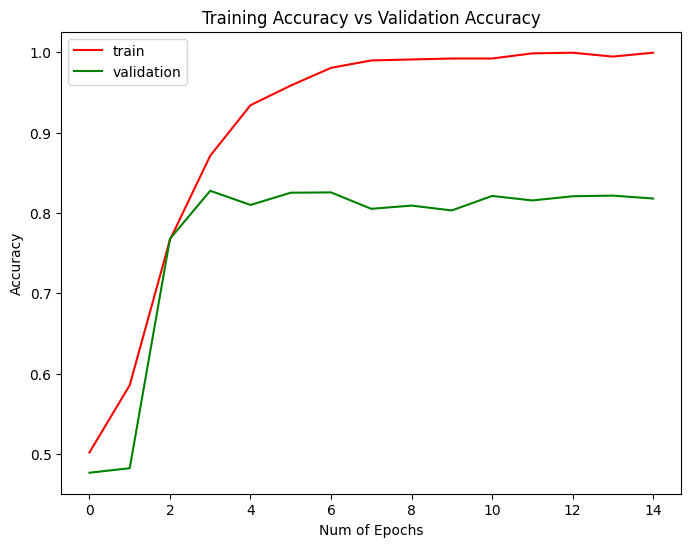

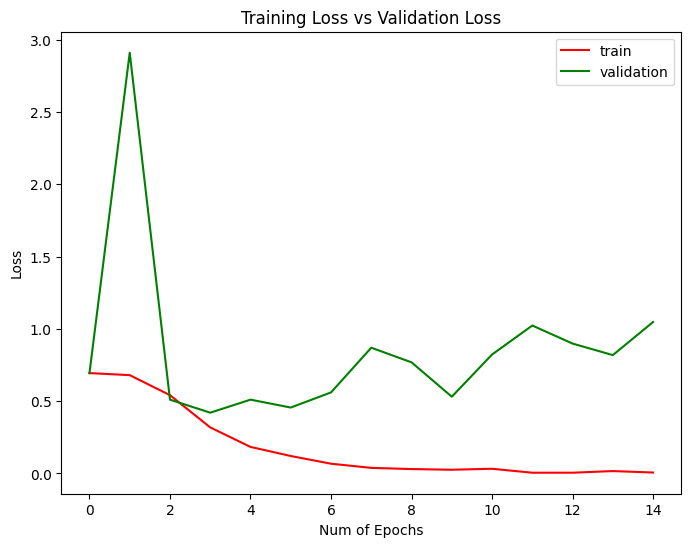

In [ ]:
plotCurves(history,15)

### Optimización del resultado

Si nos fijamos en los resultados, vemos que estamos implantando modelos más y más complejos pero no mejoramos mucho el resultado final. Esto se debe a que estamos utilizando datos muy limitados (más aún si no estamos utilizando todos los datos).

Dado que este es el último challenge (^^) vamos a intentar mezclar lo aprendido de forma un poco más creativa. El factor limitante para los resultados obtenidos con esta red es la cantidad de datos. Una vez estamos utilizando todos los datos (en colab) es posible que lleguemos al modelo óptimo en menos épocas. ¿Cómo sabemos cuantas épocas? ¿Y el LR que debemos utilizar? Vamos a por ello:

En el apartado final, vamos a intentar optimizar el resultado de nuestra red neuronal, para ello vamos a aumentar el número de datos a utilizar, y además podemos probar todo lo que se nos ocurra para hacer este entrenamiento más eficiente.

Dejamos unas cuantas ideas que podrían servir de ayuda, sin embargo, no es necesario que dediquéis demasiado tiempo y probeis todas las opciones, tan solo os ofrecemos la posibilidad de jugar :)
- Separar parte del conjunto de train y utilizarlo como validación, esto nos servirá para comprobar el resto de tareas más fácilmente
- Utilizar el callback ReduceLROnPlateau para librarnos de elegir un buen LR, empezamos con un LR un poco alto y lo dejamos bajar.
- Modificar el bucle para programar un criterio de parada, o utilizar el callback EarlyStopping para que se haga de forma automática
- Guardar el mejor resultado obtenido durante el entrenamiento (utilizando el conjunto de validación) para quedarnos con este en lugar de con el último
- ¿Qué más se os ocurre? Es el momento de curiosear en google a ver qué más podemos mejorar, cambiar o trastear :)

Por último, no olvideis escribir al final del documento vuestras impresiones acerca de cómo han afectado estos cambios o vuestra percepción acerca del rendimiento y nuestra red. Podéis serviros tanto de los resultados que observeis como de las nociones teóricas que tenemos.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

max_features = 20000
maxlen = 150
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
625/625 [==============================] - 34s 51ms/step - loss: 0.4709 - accuracy: 0.7587 - val_loss: 0.3445 - val_accuracy: 0.8604
Epoch 2/15
625/625 [==============================] - 15s 24ms/step - loss: 0.2720 - accuracy: 0.8945 - val_loss: 0.3116 - val_accuracy: 0.8678
Epoch 3/15
625/625 [==============================] - 7s 12ms/step - loss: 0.2160 - accuracy: 0.9197 - val_loss: 0.4338 - val_accuracy: 0.8312
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 0.3312 - accuracy: 0.8704
Test score: 0.3312375843524933
Test accuracy: 0.8704000115394592


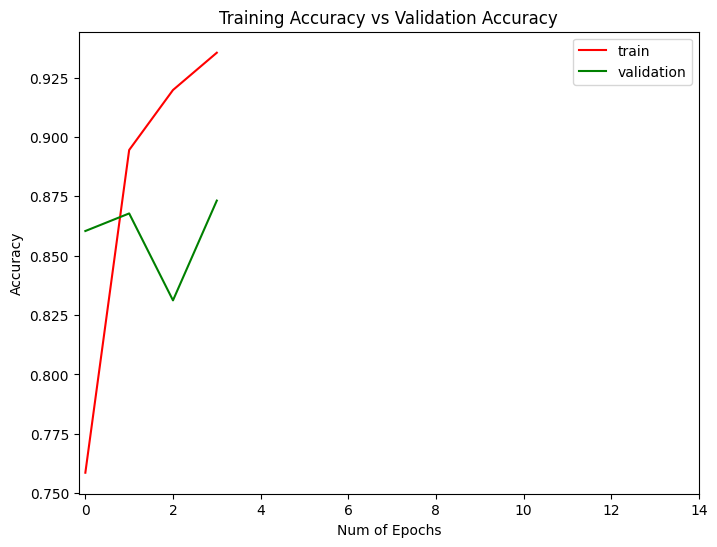

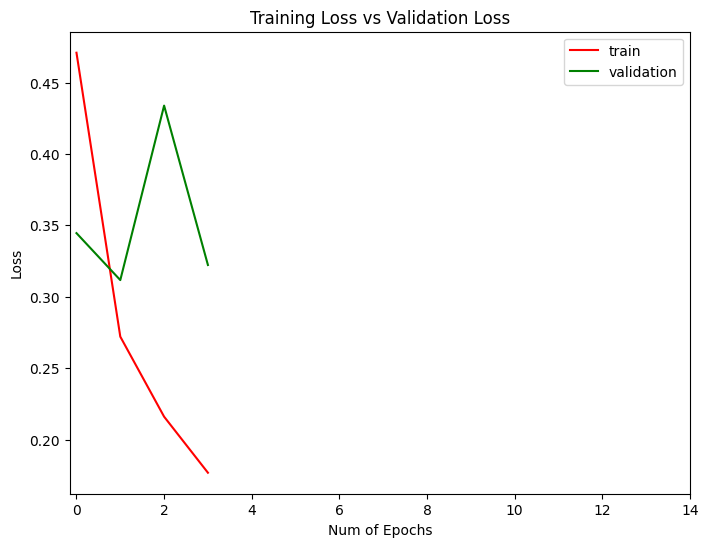

In [ ]:
plotCurves(history,15)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

max_features = 20000
maxlen = 150
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

model.load_weights('best_model.h5')

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
625/625 [==============================] - 35s 53ms/step - loss: 0.4987 - accuracy: 0.7345 - val_loss: 0.3511 - val_accuracy: 0.8502 - lr: 0.0010
Epoch 2/15
625/625 [==============================] - 9s 15ms/step - loss: 0.2829 - accuracy: 0.8878 - val_loss: 0.2944 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 3/15
623/625 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9190
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 [==============================] - 7s 11ms/step - loss: 0.2175 - accuracy: 0.9191 - val_loss: 0.2969 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 4/15
620/625 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9515
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
782/782 [==================

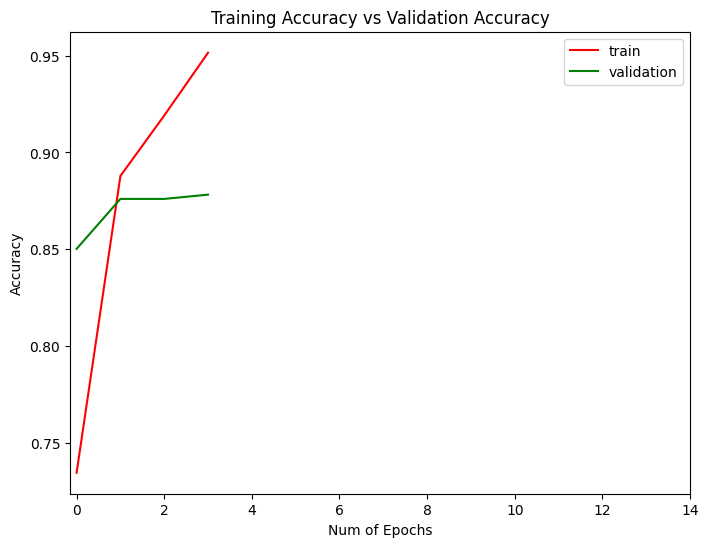

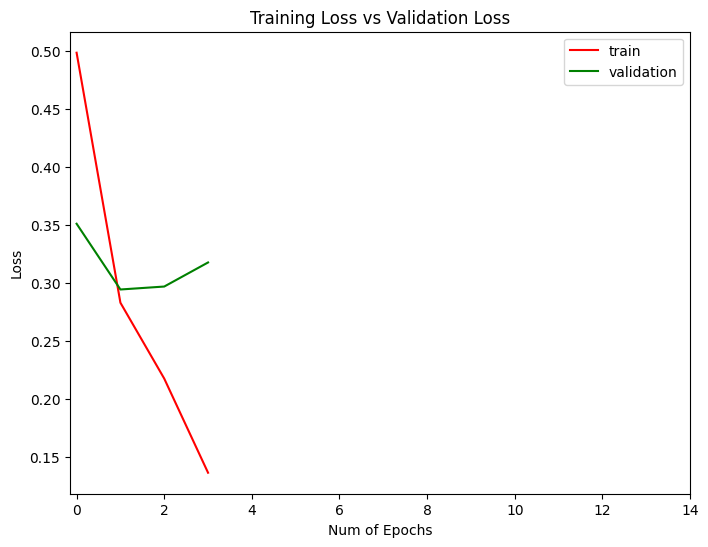

In [ ]:
plotCurves(history,15)